In [1]:
import pandas as pd

In [2]:
# Load df from CSV
df = pd.read_csv("/home/morteza/.nitropulse/outputs/pheno_df.csv", parse_dates=['date'])

print(df.shape)
df.head()

(10354, 30)


index                date  op    VH    VV  angle   lc Station station  \
0      0 2015-03-13 00:31:30   0 -21.0 -11.0   45.0  146    MB18     NaN   
1      0 2015-03-13 00:31:30   0 -20.0 -10.0   45.0  146    MB19     NaN   
2      0 2015-03-13 00:31:30   0 -24.0 -19.0   45.0  146    MB17     NaN   
3      0 2015-03-13 00:31:30   0 -20.0 -13.0   45.0   34    MB16     NaN   
4      0 2015-03-13 00:31:55   0 -19.0 -10.0   41.0  146    MB26     NaN   

  depth  ...  Clay  Classification  year  doy  BASE_TEMP  cum_GDD_air  \
0   NaN  ...   NaN             NaN  2015   72        5.0          NaN   
1   NaN  ...   NaN             NaN  2015   72        5.0          NaN   
2   NaN  ...   NaN             NaN  2015   72        5.0          NaN   
3   NaN  ...   NaN             NaN  2015   72        NaN          NaN   
4   NaN  ...   NaN             NaN  2015   72        5.0          NaN   

   cum_GDD_soil  cum_GDD  BBCH  cum_SSM  
0           NaN      NaN   NaN      NaN  
1           NaN      NaN   NaN      NaN  
2           NaN      NaN   NaN      NaN  
3           NaN      NaN   NaN      NaN  
4           NaN      NaN   NaN      NaN  

[5 rows x 30 columns]

In [3]:
from nitropulse import Inverse

# Set the bacscattering models
RT_models = {
    'RT_s': 'AIEM', # options: 'AIEM', 'PRISM1'
    'RT_c': 'Diff' # options: 'Diffuse', 'Specular'
}

inv = Inverse(workspace_dir='/home/morteza/.nitropulse', fGHz=5.405, models=RT_models, acftype='exp')
inv_df = inv.run(df)

/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/aiem/aiem.py:439: RuntimeWarning: overflow encountered in scalar multiply
  temp = temp_old * base / iterm
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/aiem/aiem.py:436: RuntimeWarning: invalid value encountered in scalar subtract
  while abs(temp - temp_old) > tol:
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/aiem/aiem.py:342: RuntimeWarning: overflow encountered in scalar power
  sum1 += temp1 * kscs**(2. * fn) * self.Wn[n]
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/aiem/aiem.py:343: RuntimeWarning: overflow encountered in scalar power
  sum2 += temp1 * kscs**(2. * fn) * np.abs(Ftv + 2.0**(fn + 2.0) * (rv0 / self.csti) * np.exp(-kscs**2))**2 * self.Wn[n]
/home/morteza/usask/nitropulse/.venv/lib/python3.11/site-packages/aiem/aiem.py:344: RuntimeWarning: overflow encountered in scalar power
  sum3 += temp1 * kscs**(2. * fn) * np.abs(Fth + 2.0**(fn + 2.0) * 

In [4]:
print(inv_df.shape)
inv_df.head()

(5051, 41)


index                date  op    VH    VV  angle   lc Station station  \
14      0 2015-03-28 00:56:57   0 -21.0 -11.0   41.0  110     SK3     SK3   
15      0 2015-03-28 00:56:57   0 -15.0 -11.0   41.0  110     SK4     SK4   
16      0 2015-03-28 00:56:57   0 -17.0 -11.0   41.0  122     SK2     SK2   
17      0 2015-03-28 00:56:57   0 -18.0 -11.0   41.0  122     SK1     SK1   
46      0 2015-04-25 00:23:20   0 -20.0 -11.0   40.0  158     MB7     MB7   

        depth  ...         c         w        vvv        vvs         s  \
14  0 to 5 cm  ...  0.091748  0.094531 -13.991384 -14.029299  0.038240   
15  0 to 5 cm  ...  0.100000  0.100000 -14.047640 -13.973278  0.038606   
16  0 to 5 cm  ...  0.100000  0.100000 -14.060940 -13.960243  0.040100   
17  0 to 5 cm  ...  0.091390  0.104585 -13.958707 -14.062513  0.044286   
46  0 to 5 cm  ...  0.094532  0.111709 -14.053754 -13.967277  0.040103   

           l       rvi    height     k    b  
14  0.083454  0.363636  0.002909   0.8  0.0  
15  0.074577  1.138989  0.009112   0.8  0.0  
16  0.074518  0.803040  0.008030   1.0  0.0  
17  0.081773  0.665350  0.006654   1.0  0.0  
46  0.081387  0.447263  0.004249  0.95  0.0  

[5 rows x 41 columns]

In [ ]:
inv_df.to_csv("/home/morteza/.nitropulse/outputs/inv_df.csv", index=False)

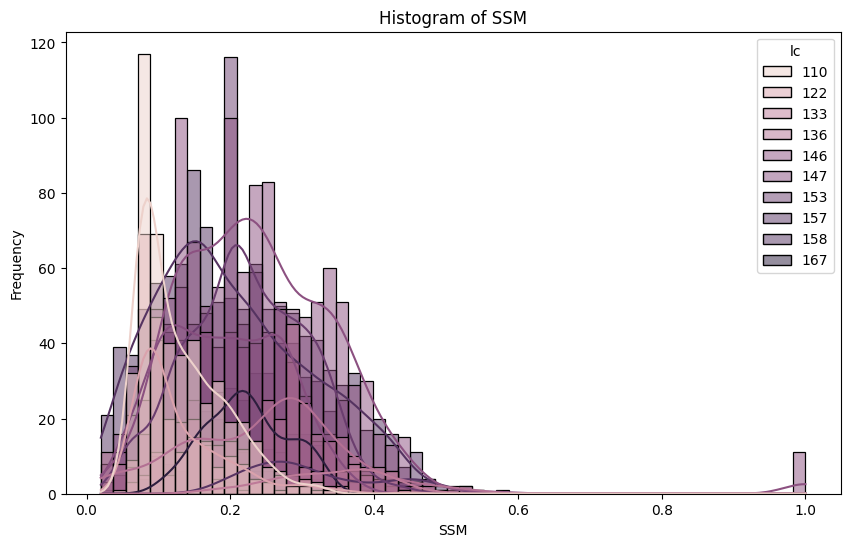

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gp_merged' DataFrame is already created as in the provided code.

plt.figure(figsize=(10, 6))
sns.histplot(inv_df, x='SSM', kde=True, hue='lc')
plt.title('Histogram of SSM')
plt.xlabel('SSM')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_18129/369816459.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))


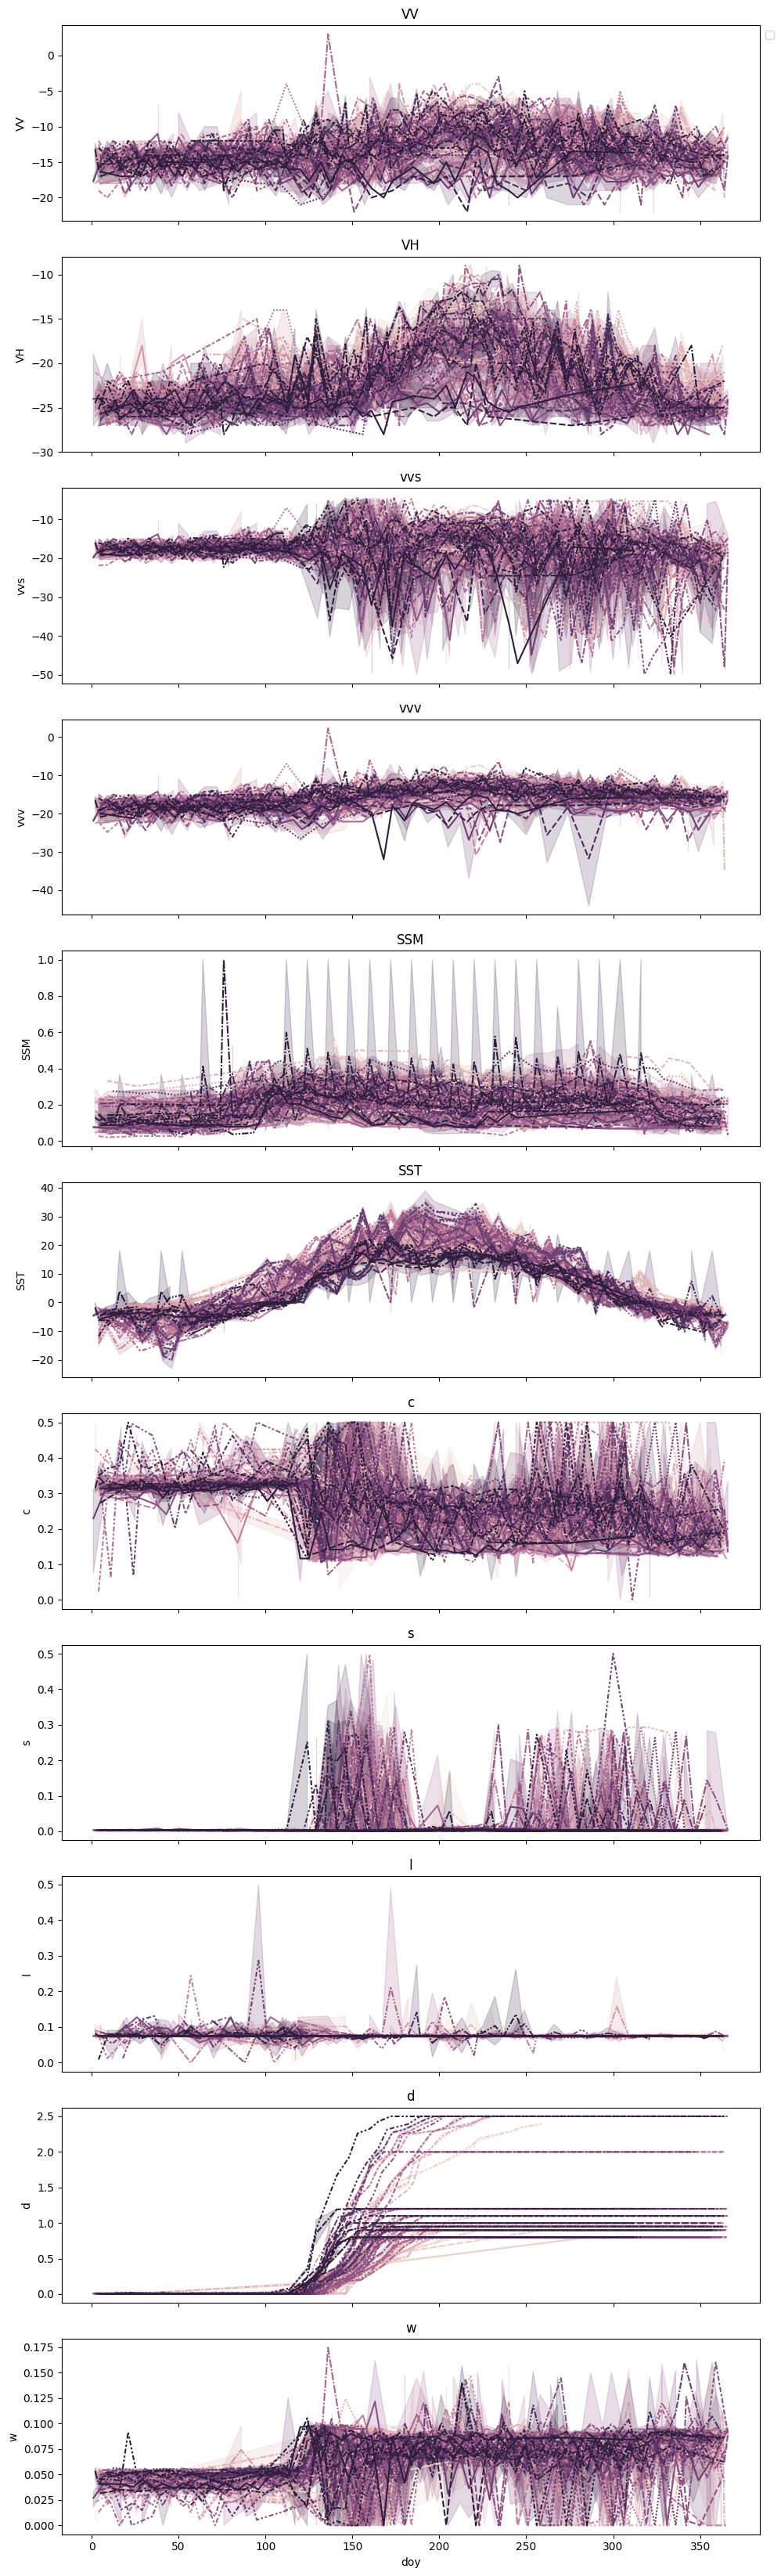

In [7]:
# Assuming 'gp_merged' DataFrame is already created as in the provided code.

parameters = ['VV', 'VH', 'vvs', 'vvv', 'SSM', 'SST', 'c', 's', 'l', 'd', 'w']
num_parameters = len(parameters)

fig, axes = plt.subplots(num_parameters, 1, figsize=(10, 3 * num_parameters), sharex=True)

for i, param in enumerate(parameters):
    sns.lineplot(ax=axes[i], x='doy', y=param, data=inv_df, hue='year', style='lc', legend=False)
    axes[i].set_title(param)
    # Add legend only to the first subplot
    if i == 0:
        axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()